# Calculation of the nonlinear susceptibilty tensor in a circular basis
#### This notebook shows the transformation of the second order nonlinar susceptibilty tensor from cartesian basis to a circular polarization basis.
#### This code is complementary to the published work A. Lorenzo-Ruiz, Y. Léger ...

In [1]:
from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt
from sympy import symbols, pprint, sqrt, I, init_printing, simplify
from sympy.physics.quantum import TensorProduct
from IPython.display import display
init_printing()

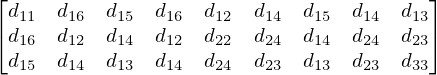

In [2]:
d11, d12, d13, d14, d15, d16, d22, d23, d24, d33 = symbols("d11 d12 d13 d14 d15 d16 d22 d23 d24 d33")
susc = Matrix([[d11,d16,d15,d16,d12,d14,d15,d14,d13], [d16,d12,d14,d12,d22,d24,d14,d24,d23], [d15,d14,d13,d14,d24,d23,d13,d23,d33]])
display(susc)

In [3]:
#definition of the transfer matrices for circular polarization basis
# Jones matrix
rot = 1/sqrt(2)*Matrix([[1,-I], [1,I]])  # consistent with Rothberg lecture Washington university
rotm = 1/sqrt(2)*Matrix([[1,1], [I,-I]])

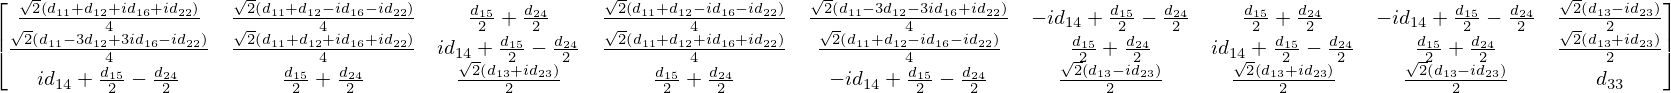

In [4]:
rot3 = zeros(3, 3)
rotm3 = zeros(3, 3)
rot3[0:2, 0:2] = rot
rotm3[0:2, 0:2] = rotm
rot3[2, 2] = 1
rotm3[2, 2] = 1
ROTmA = TensorProduct(rotm3,eye(3, 3))
ROTmB = TensorProduct(eye(3, 3),rotm3)
susc_CP = rot3*susc*ROTmA*ROTmB
display(simplify(susc_CP))

In [5]:
DCP = zeros(3, 6)
DCP[:, 0] = susc_CP[:, 0]
DCP[:, 1] = susc_CP[:, 4]
DCP[:, 2] = susc_CP[:, 8]
DCP[:, 3] = (susc_CP[:, 5]+susc_CP[:, 7])/2
DCP[:, 4] = (susc_CP[:, 2]+susc_CP[:, 6])/2
DCP[:, 5] = (susc_CP[:, 1]+susc_CP[:, 3])/2

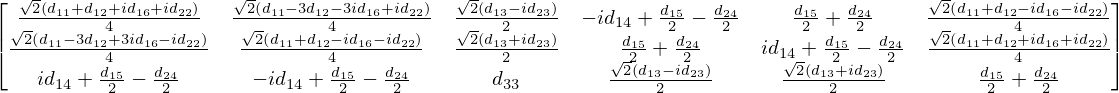

In [6]:
DCP2 = simplify(DCP)
display(DCP2)

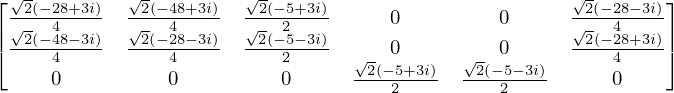

In [7]:
DCP2.subs({d11:-33, d12:5, d13:-5, d14:0, d15:0, d16:0, d22:3, d23:-3, d24:0, d33:0})